# VendVentures Sales Optimization Case Study

Hello! Welcome to my sample analysis for VendVentures, a Vending Machine company based in Chicago, IL. <br>

**Case Study Prompt**
- Using Open Pipeline, Deals Won TYD, and 2023 Quota targets data share insights on how VendVenture's performance against 2023 Quota goals identify any risks on achieving the Quota goals
 
**Dataset assumptions:**
- Contains point in time data as of June 1st 2023, Deals Won run through the end of May and the Discovery and Pipeline opportunties run through end of December 2023
- The dataset needs to be analyzed quickly and the C-suite is looking for data-driven reccomendations where clarity on the dataset cannot be investigated (i.e. updating null values)
- The delivery platform launched in 2022

The following analysis will look to showcase the following skillset:
- 🎯 **Structuring Problems:** Demonstrate how I structure my thoughts and approach problems 
- 📊 **Data Analytics Knowledge:** Ability to utilize 🐍 python and 🐼 pandas to clean and analyze data
- 🔥 **Providing Data-driven Insights:** Ability to dive into the root cause and provide actionable recommendations

- Disclaimer: This portfolio is for illustrative purposes. The content is not business advice. The contents of this portfolio are not associated with any current employer or former employer and is solely used as a personal page to showcase the skillsets listed above. All files were produced on Mac OS

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from datetime import datetime as dt
import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## Getting familar with the Dataset
In this section, I have utlized pandas to clean the dataset along with adding additional fields. I will use in my analysis.

In [3]:
#Pulling data from xlsx source
df1 = pd.read_excel('Sales_Ops_Case_study_raw.xlsx', sheet_name='2023 Opportunity Data')
df2 = pd.read_excel('Sales_Ops_Case_study_raw.xlsx', sheet_name='2023 Quota')


Based on the initial look of 2023 Opportunity Data, the data set is organized by:
- Stages: VendVentures stages opportunties by Discovery, Pipeline, and Deals Won. For the purposes of assessing current quota performance, I will focus on the Deal Won opportunities and then review overall pipeline health

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Opportunity_ID     620 non-null    object        
 1   Opportunity Owner  620 non-null    object        
 2   Industry           620 non-null    object        
 3   Market             620 non-null    object        
 4   Region             620 non-null    object        
 5   Created Date       620 non-null    datetime64[ns]
 6   Close Date         620 non-null    datetime64[ns]
 7   ARR                620 non-null    int64         
 8   Stage              620 non-null    object        
 9   Priority Account   620 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 48.6+ KB


In [5]:
df1.head()

,Opportunity_ID,Opportunity Owner,Industry,Market,Region,Created Date,Close Date,ARR,Stage,Priority Account
0,Education_1,Sales Lead A,Education,DC / Baltimore,Northeast,2021-02-02,2023-10-23,38000,Pipeline,No
1,Education_2,Sales Lead A,Education,Philadelphia,Northeast,2021-09-16,2023-06-12,53000,Pipeline,Yes
2,Education_3,Sales Lead G,Education,Los Angeles,West,2021-12-17,2023-12-27,51000,Discovery,No
3,Education_4,Sales Lead G,Education,Los Angeles,West,2021-12-17,2023-08-21,51000,Discovery,No
4,Healthcare_1,Sales Lead A,Healthcare,DC / Baltimore,Northeast,2022-01-05,2023-09-08,38000,Pipeline,No


In [6]:
# Get unique Opportunity Owners
unique_owners = df1['Opportunity Owner'].unique()

# Display the list of unique Opportunity Owners
print(unique_owners)



['Sales Lead A' 'Sales Lead G' 'Sales Lead E' 'Sales Lead I'
 'Sales Lead F' 'Sales Lead B' 'Sales Lead C' 'Sales Lead D'
 'Sales Lead D ' 'Sales Lead F ' 'Sales Lead H' 'Sales Lead C '
 'Sales Lead B ' 'Sales Lead E ' 'Sales Lead I ' 'Sales Lead H '
 'Sales Lead G ']


In [7]:
#Replace all 'spaced' values to only have 9 reps in the data set
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead A ', 'Sales Lead A')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead B ', 'Sales Lead B')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead C ', 'Sales Lead C')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead D ', 'Sales Lead D')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead E ', 'Sales Lead E')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead F ', 'Sales Lead F')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead G ', 'Sales Lead G')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead H ', 'Sales Lead H')
df1['Opportunity Owner'] = df1['Opportunity Owner'].str.replace('Sales Lead I ', 'Sales Lead I')

In [8]:
# Get unique Opportunity Owners
unique_owners = df1['Opportunity Owner'].unique()

# Display the list of unique Opportunity Owners
print(unique_owners)

# Sales Team has 9 members

['Sales Lead A' 'Sales Lead G' 'Sales Lead E' 'Sales Lead I'
 'Sales Lead F' 'Sales Lead B' 'Sales Lead C' 'Sales Lead D'
 'Sales Lead H']


In [9]:
df2['Individual'].unique()

array([nan, 'Sales Lead A', 'Sales Lead E', 'Sales Lead I',
       'Sales Lead D', 'Sales Lead H', 'Sales Lead B', 'Sales Lead C',
       'Sales Lead F', 'Sales Lead G', 'Total Quota'], dtype=object)

In [10]:
print(df1['Industry'].unique())

# Operates in 7 Industries

['Education' 'Healthcare' 'Office' 'Small Office' 'Other' 'Travel/Leisure'
 'Residential Property']


In [11]:
print(df1['Industry'].nunique())


7


In [12]:
print(df1['Market'].unique())

['DC / Baltimore' 'Philadelphia' 'Los Angeles' 'Boston' 'New York City'
 'San Diego' 'New Jersey' 'Dallas' 'Houston' 'Indianapolis' 'Chicago'
 'Austin' 'Detroit' 'St. Louis' 'Columbus' 'Cincinnati' 'Minneapolis'
 'Milwaukee' 'Cleveland']


In [13]:
print(df1['Market'].nunique())
# Across 19 cities

19


In [14]:
print(df1['Region'].unique())
# Across 4 regions

['Northeast' 'West' 'Northwest' 'South' 'Midwest']


*Data Error:* I have identified an error in our dataset concerning the Region data, the Markets listed are not located Northwest of the US. Specifically, the region currently labeled as "Northwest" incorrectly includes the following cities: Boston, DC, Baltimore, New Jersey, New York City, and Philadelphia. To accurately reflect the geographical locations of these cities, I will be updating the dataset to reassign them to the "Northeast" region.

In [15]:
# Filter df1 for the 'Northwest' region
northwest_data = df1[df1['Region'] == 'Northwest']

# Count the number of opportunities at each stage for each market
market_stage_count = northwest_data.groupby(['Market', 'Stage']).size().reset_index(name='Count')

market_stage_count

,Market,Stage,Count
0,Boston,Deal Won,4
1,DC / Baltimore,Deal Won,5
2,New Jersey,Deal Won,14
3,New York City,Deal Won,14
4,Philadelphia,Deal Won,6


In [16]:
# Reassign 'Northwest' region to 'Northeast'
df1.loc[df1['Region'] == 'Northwest', 'Region'] = 'Northeast'

# Verify the changes
df1[df1['Region'] == 'Northeast'].head()

,Opportunity_ID,Opportunity Owner,Industry,Market,Region,Created Date,Close Date,ARR,Stage,Priority Account
0,Education_1,Sales Lead A,Education,DC / Baltimore,Northeast,2021-02-02,2023-10-23,38000,Pipeline,No
1,Education_2,Sales Lead A,Education,Philadelphia,Northeast,2021-09-16,2023-06-12,53000,Pipeline,Yes
4,Healthcare_1,Sales Lead A,Healthcare,DC / Baltimore,Northeast,2022-01-05,2023-09-08,38000,Pipeline,No
5,Education_5,Sales Lead E,Education,Boston,Northeast,2022-01-14,2023-12-29,53000,Pipeline,Yes
6,Healthcare_2,Sales Lead E,Healthcare,Boston,Northeast,2022-01-24,2023-08-23,51000,Pipeline,No


In [17]:
print(df1['Stage'].unique())

# 3 Stages within the Sales Process

['Pipeline' 'Discovery' 'Deal Won']


In [18]:
# Count the number of unique Opportunity IDs for each stage
opportunity_count_by_stage = df1.groupby('Stage')['Opportunity_ID'].nunique()

# Display the counts
print("Opportunity Count by Stage:")
print(opportunity_count_by_stage)

Opportunity Count by Stage:
Stage
Deal Won     171
Discovery    334
Pipeline     115
Name: Opportunity_ID, dtype: int64


In [19]:
print(df1['Priority Account'].unique())
# 2 levels of priority - What's important to VendVentures?

['No' 'Yes']


### Initial Observations - 2023 Opportunity Data

#### 1. **ARR and Priority Accounts**
- **Observation:** The median ARR values across all stages are consistent for Priority Accounts. 
- **Insight:** This suggests that while Priority Accounts are significant, they do not necessarily contribute to higher ARR values uniformly across different stages.

#### 2. **Industry Focus in Priority Accounts**
- **Key Industries:** Education and Healthcare are exclusively marked as Priority Accounts.
- **Strategic Direction:** VendVentures aims to expand its footprint in universities and hospital systems throughout 2023. This aligns with the company's strategic goals and highlights the importance of these sectors.

#### 3. **Regional Prioritization**
- **Midwest Dominance:** The Midwest region leads in closed opportunities, particularly in Education (22 Deals Won) and Healthcare (17 Deals Won).
- **Northeast Potential:** The Northeast region shows significant potential, with the highest number of open opportunities in both Education (32) and Healthcare (13). This indicates a ripe market for focused efforts.

#### 4. **Market Performance of Priority Accounts**
- **Strongholds:** Detroit emerges as a key market with the highest number of closed deals in both Education (10) and Healthcare (17).
- **Growth Opportunities:** 
  - **Education:** Austin presents substantial growth opportunities with 14 open opportunities.
  - **Healthcare:** Both Dallas and Detroit offer promising prospects, each with 8 open opportunities.


#### Is ARR a key charactistic for Priority Accounts?: 

In [20]:
# Count the number of 'Yes' and 'No' in 'Priority Account' for each 'Stage'
priority_account_counts_by_stage = df1.groupby('Stage')['Priority Account'].value_counts().unstack()

# Calculate the total counts of 'Yes' and 'No' across all stages
total_priority_account_counts = df1['Priority Account'].value_counts()

# Display the counts by stage
print("Priority Account Counts by Stage:")
print(priority_account_counts_by_stage)

# Display the total counts
print("\nTotal Priority Account Counts:")
print(total_priority_account_counts)


Priority Account Counts by Stage:
Priority Account   No  Yes
Stage                     
Deal Won          100   71
Discovery         255   79
Pipeline           79   36

Total Priority Account Counts:
No     434
Yes    186
Name: Priority Account, dtype: int64


In [21]:
df1.describe()

,ARR
count,620.000000
mean,34229.677419
std,11264.388676
min,25000.000000
25%,25000.000000
50%,27000.000000
75%,40000.000000
max,157000.000000


In [22]:
df1.groupby('Stage').describe()


ARR                                                         \
           count          mean           std      min      25%      50%   
Stage                                                                     
Deal Won   171.0  36084.210526   9236.795780  25000.0  27000.0  38000.0   
Discovery  334.0  32235.329341  10736.217943  25000.0  25000.0  27000.0   
Pipeline   115.0  37264.347826  14104.635242  25000.0  27000.0  38000.0   

                              
               75%       max  
Stage                         
Deal Won   40000.0   77000.0  
Discovery  38000.0  157000.0  
Pipeline   40000.0  129000.0

In [23]:
# Filter the DataFrame for rows where 'Priority Account' is 'Yes'
priority_df = df1[df1['Priority Account'] == 'Yes']

# Generate descriptive statistics grouped by 'Stage' for priority accounts
descriptive_stats_priority_by_stage = priority_df.groupby('Stage').describe()

descriptive_stats_priority_by_stage


ARR                                                         \
          count          mean           std      min      25%      50%   
Stage                                                                    
Deal Won   71.0  35380.281690   8572.924484  25000.0  27000.0  38000.0   
Discovery  79.0  33217.721519  10097.330943  25000.0  25000.0  27000.0   
Pipeline   36.0  41722.222222  13026.941558  25000.0  35250.0  38000.0   

                             
               75%      max  
Stage                        
Deal Won   40000.0  53000.0  
Discovery  40000.0  64000.0  
Pipeline   53000.0  79000.0

In [24]:
# Filter the DataFrame for rows where 'Priority Account' is 'No'
non_priority_df = df1[df1['Priority Account'] == 'No']

# Generate descriptive statistics grouped by 'Stage' for non-priority accounts
descriptive_stats_non_priority_by_stage = non_priority_df.groupby('Stage').describe()

# Display the descriptive statistics
descriptive_stats_non_priority_by_stage


ARR                                                         \
           count          mean           std      min      25%      50%   
Stage                                                                     
Deal Won   100.0  36584.000000   9691.876428  25000.0  27000.0  38000.0   
Discovery  255.0  31930.980392  10927.690979  25000.0  25000.0  27000.0   
Pipeline    79.0  35232.911392  14186.610892  25000.0  27000.0  30200.0   

                              
               75%       max  
Stage                         
Deal Won   40000.0   77000.0  
Discovery  38000.0  157000.0  
Pipeline   40000.0  129000.0

#### Is the Industry a key characteristic for Priority Accounts?: 

In [25]:
# Group by both 'Industry' and 'Stage', then calculate mean, median, and count for 'ARR'
industry_stage_stats = df1.groupby(['Industry', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry
industry_subtotals = df1.groupby(['Industry'])['ARR'].count().rename('Total Count by Industry')

# Display the results
print("Mean, Median, and Count of ARR by Industry and Stage:")
print(industry_stage_stats)
print("\nSubtotals of Count by Industry:")
print(industry_subtotals)



Mean, Median, and Count of ARR by Industry and Stage:
                                        mean   median  count
Industry             Stage                                  
Education            Deal Won   30566.666667  27000.0     51
                     Discovery  28554.887218  27000.0    133
                     Pipeline   35538.461538  27000.0     39
Healthcare           Deal Won   40104.878049  40000.0     82
                     Discovery  40023.300971  40000.0    103
                     Pipeline   42353.846154  38000.0     39
Office               Deal Won   32066.666667  26000.0      6
                     Discovery  28000.000000  27000.0     28
                     Pipeline   31261.538462  27000.0     13
Other                Discovery  28750.000000  26000.0      4
Residential Property Deal Won   27000.000000  27000.0      1
                     Discovery  25666.666667  25000.0      3
                     Pipeline   27000.000000  27000.0      2
Small Office         Deal Won  

In [26]:
# Filter the DataFrame for Priority Accounts
priority_df = df1[df1['Priority Account'] == 'Yes']

# Group by both 'Industry' and 'Stage', then calculate mean, median, and count for 'ARR'
industry_stage_stats_priority = priority_df.groupby(['Industry', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry for Priority Accounts
industry_subtotals_priority = priority_df.groupby(['Industry'])['ARR'].count().rename('Total Count by Industry for Priority Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Industry and Stage for Priority Accounts:")
print(industry_stage_stats_priority)
print("\nSubtotals of Count by Industry for Priority Accounts:")
print(industry_subtotals_priority)


Mean, Median, and Count of ARR by Industry and Stage for Priority Accounts:
                              mean   median  count
Industry   Stage                                  
Education  Deal Won   29427.777778  27000.0     36
           Discovery  29803.636364  27000.0     55
           Pipeline   40200.000000  39300.0     20
Healthcare Deal Won   41502.857143  40000.0     35
           Discovery  41041.666667  40000.0     24
           Pipeline   43625.000000  38000.0     16

Subtotals of Count by Industry for Priority Accounts:
Industry
Education     111
Healthcare     75
Name: Total Count by Industry for Priority Accounts, dtype: int64


#### How are VendVentures priority accounts by Market?

In [27]:
# Filter the DataFrame for Priority Accounts
priority_df = df1[df1['Priority Account'] == 'Yes']

# Filter the DataFrame for Priority Accounts and only 'Deal Won' stage
priority_df_deal_won = priority_df[priority_df['Stage'] == 'Deal Won']

# Group by 'Industry', 'Market', and 'Stage', then calculate mean, median, and count for 'ARR'
industry_market_stage_stats_priority = priority_df_deal_won.groupby(['Industry', 'Market', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry and market for Priority Accounts
industry_market_subtotals_priority = priority_df_deal_won.groupby(['Industry', 'Market'])['ARR'].count().rename('Total Count by Industry and Market for Priority Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Industry, Market, and Stage for Priority Accounts:")
print(industry_market_stage_stats_priority)
print("\nSubtotals of Count by Industry and Market for Priority Accounts:")
print(industry_market_subtotals_priority)


Mean, Median, and Count of ARR by Industry, Market, and Stage for Priority Accounts:
                                            mean   median  count
Industry   Market         Stage                                 
Education  Boston         Deal Won  32200.000000  32200.0      1
           Chicago        Deal Won  25000.000000  25000.0      1
           Cincinnati     Deal Won  25285.714286  25000.0      7
           DC / Baltimore Deal Won  39000.000000  39000.0      2
           Dallas         Deal Won  48000.000000  51000.0      3
           Detroit        Deal Won  26400.000000  27000.0     10
           Houston        Deal Won  27000.000000  27000.0      1
           Los Angeles    Deal Won  25000.000000  25000.0      2
           Milwaukee      Deal Won  25000.000000  25000.0      4
           New Jersey     Deal Won  33800.000000  32500.0      4
           New York City  Deal Won  27000.000000  27000.0      1
Healthcare Austin         Deal Won  39333.333333  40000.0      3
     

In [28]:
# Filter the DataFrame for Priority Accounts
priority_df = df1[df1['Priority Account'] == 'Yes']

# Filter the DataFrame for Priority Accounts and only 'Discovery' and 'Pipeline' stages
priority_df_discovery_pipeline = priority_df[(priority_df['Stage'] == 'Discovery') | (priority_df['Stage'] == 'Pipeline')]

# Group by 'Industry', 'Market', and 'Stage', then calculate mean, median, and count for 'ARR'
industry_market_stage_stats_priority = priority_df_discovery_pipeline.groupby(['Industry', 'Market', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry and market for Priority Accounts
industry_market_subtotals_priority = priority_df_discovery_pipeline.groupby(['Industry', 'Market'])['ARR'].count().rename('Total Count by Industry and Market for Priority Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Industry, Market, and Stage for Priority Accounts:")
print(industry_market_stage_stats_priority)
print("\nSubtotals of Count by Industry and Market for Priority Accounts:")
print(industry_market_subtotals_priority)


Mean, Median, and Count of ARR by Industry, Market, and Stage for Priority Accounts:
                                             mean   median  count
Industry   Market         Stage                                  
Education  Austin         Discovery  31830.769231  27000.0     13
                          Pipeline   61400.000000  61400.0      1
           Boston         Discovery  41280.000000  42600.0      5
                          Pipeline   45500.000000  45500.0      2
           Chicago        Discovery  27000.000000  27000.0      2
           Cincinnati     Discovery  25000.000000  25000.0      1
           Columbus       Discovery  27000.000000  27000.0      1
           DC / Baltimore Discovery  27000.000000  27000.0      3
                          Pipeline   53200.000000  53000.0      3
           Detroit        Discovery  26000.000000  26000.0      2
                          Pipeline   25666.666667  25000.0      3
           Houston        Discovery  26200.000000  27000.

#### How are VendVentures priority accounts by Region?

In [29]:
# Filter the DataFrame for Priority Accounts
priority_df = df1[df1['Priority Account'] == 'Yes']

# Group by 'Region' and 'Stage', then calculate mean, median, and count for 'ARR'
region_stage_stats_priority = priority_df.groupby(['Region', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by region for Priority Accounts
region_subtotals_priority = priority_df.groupby(['Region'])['ARR'].count().rename('Total Count by Region for Priority Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Region and Stage for Priority Accounts:")
print(region_stage_stats_priority)
print("\nSubtotals of Count by Region for Priority Accounts:")
print(region_subtotals_priority)


Mean, Median, and Count of ARR by Region and Stage for Priority Accounts:
                             mean   median  count
Region    Stage                                  
Midwest   Deal Won   31758.974359  27000.0     39
          Discovery  30333.333333  27000.0     18
          Pipeline   30600.000000  27000.0      5
Northeast Deal Won   37533.333333  38000.0     12
          Discovery  34056.000000  27000.0     25
          Pipeline   40430.000000  38000.0     20
South     Deal Won   43533.333333  40000.0     15
          Discovery  33288.888889  27000.0     27
          Pipeline   61400.000000  61400.0      1
West      Deal Won   34000.000000  40000.0      5
          Discovery  36444.444444  40000.0      9
          Pipeline   47900.000000  45500.0     10

Subtotals of Count by Region for Priority Accounts:
Region
Midwest      62
Northeast    57
South        43
West         24
Name: Total Count by Region for Priority Accounts, dtype: int64


In [30]:
# Filter the DataFrame for Priority Accounts
priority_df = df1[df1['Priority Account'] == 'Yes']

# Filter the DataFrame for Priority Accounts and only 'Deal Won' stage
priority_df_deal_won = priority_df[priority_df['Stage'] == 'Deal Won']

# Group by 'Industry', 'Region', and 'Stage', then calculate mean, median, and count for 'ARR'
industry_region_stage_stats_deal_won = priority_df_deal_won.groupby(['Industry', 'Region', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry and region for Priority Accounts
industry_region_subtotals_deal_won = priority_df_deal_won.groupby(['Industry', 'Region'])['ARR'].count().rename('Total Count by Industry and Region for Deal Won')

# Display the results
print("Mean, Median, and Count of ARR by Industry, Region, and Stage for Deal Won Priority Accounts:")
print(industry_region_stage_stats_deal_won)
print("\nSubtotals of Count by Industry and Region for Deal Won Priority Accounts:")
print(industry_region_subtotals_deal_won)


Mean, Median, and Count of ARR by Industry, Region, and Stage for Deal Won Priority Accounts:
                                       mean   median  count
Industry   Region    Stage                                 
Education  Midwest   Deal Won  25727.272727  25000.0     22
           Northeast Deal Won  34050.000000  32500.0      8
           South     Deal Won  42750.000000  45500.0      4
           West      Deal Won  25000.000000  25000.0      2
Healthcare Midwest   Deal Won  39564.705882  40000.0     17
           Northeast Deal Won  44500.000000  44500.0      4
           South     Deal Won  43818.181818  40000.0     11
           West      Deal Won  40000.000000  40000.0      3

Subtotals of Count by Industry and Region for Deal Won Priority Accounts:
Industry    Region   
Education   Midwest      22
            Northeast     8
            South         4
            West          2
Healthcare  Midwest      17
            Northeast     4
            South        11
            W

In [31]:
# Filter the DataFrame for Priority Accounts
priority_df = df1[df1['Priority Account'] == 'Yes']

# Filter the DataFrame for Priority Accounts and only 'Discovery' and 'Pipeline' stages
priority_df_discovery_pipeline = priority_df[(priority_df['Stage'] == 'Discovery') | (priority_df['Stage'] == 'Pipeline')]

# Group by 'Industry', 'Region', and 'Stage', then calculate mean, median, and count for 'ARR'
industry_region_stage_stats_priority = priority_df_discovery_pipeline.groupby(['Industry', 'Region', 'Stage'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry and region for Priority Accounts
industry_region_subtotals_priority = priority_df_discovery_pipeline.groupby(['Industry', 'Region'])['ARR'].count().rename('Total Count by Industry and Region for Priority Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Industry, Region, and Stage for Priority Accounts:")
print(industry_region_stage_stats_priority)
print("\nSubtotals of Count by Industry and Region for Priority Accounts:")
print(industry_region_subtotals_priority)



Mean, Median, and Count of ARR by Industry, Region, and Stage for Priority Accounts:
                                        mean   median  count
Industry   Region    Stage                                  
Education  Midwest   Discovery  26000.000000  26000.0     12
                     Pipeline   25666.666667  25000.0      3
           Northeast Discovery  30231.578947  27000.0     19
                     Pipeline   39430.769231  38000.0     13
           South     Discovery  30266.666667  27000.0     18
                     Pipeline   61400.000000  61400.0      1
           West      Discovery  34666.666667  26000.0      6
                     Pipeline   51000.000000  51000.0      3
Healthcare Midwest   Discovery  39000.000000  39000.0      6
                     Pipeline   38000.000000  38000.0      2
           Northeast Discovery  46166.666667  40000.0      6
                     Pipeline   42285.714286  38000.0      7
           South     Discovery  39333.333333  40000.0      9


### Initial Observations: 2023 Quota Allocation

VendVentures has strategically divided its operations into four primary territories for the year 2023: Northeast, Midwest, South, and West. Each territory is overseen by dedicated Sales Leads, ensuring focused and effective management. The quota distribution across these regions reflects the company's strategic priorities and market expectations.

#### 2023 Quota Breakdown
- **Total Company Quota:** \\$14,734,500
  - This figure represents the collective target set for the entire organization, signifying VendVentures' ambitious growth plans for the year.

- **Regional Quotas:**
  - **Northeast:** \\$4,474,000
    - A significant portion of the quota is allocated to the Northeast, indicating high expectations for market performance in this region.
  - **Midwest:** \\$3,237,500
    - The Midwest region holds a substantial quota, reflecting its importance in the company's overall strategy.
  - **South:** \\$4,550,000
    - With one of the highest quotas, the South region is evidently a key area for VendVentures' growth and expansion.
  - **West:** \\$2,473,000
    - The West, while having a lower quota compared to other regions, remains an integral part of the company's nationwide strategy.

The alignment of these quotas with the 2023 Opportunity Data will provide further insights into the company's strategic direction and areas of focus.


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      4 non-null      object 
 1   Individual  10 non-null     object 
 2   2023 Quota  14 non-null     float64
dtypes: float64(1), object(2)
memory usage: 488.0+ bytes


In [33]:
df2.head(20)

,Region,Individual,2023 Quota
0,Northeast,NaN,4474000.0
1,NaN,Sales Lead A,2001000.0
2,NaN,Sales Lead E,1236500.0
3,NaN,Sales Lead I,1236500.0
4,Midwest,NaN,3237500.0
5,NaN,Sales Lead D,2001000.0
6,NaN,Sales Lead H,1236500.0
7,South,NaN,4550000.0
8,NaN,Sales Lead B,2274000.0
9,NaN,Sales Lead C,2276000.0


In [34]:
#Updating Quota table so it's easier to analyze

# Adding Region to each Rep line item
df2['Region'] = df2['Region'].ffill()

# Drop rows with NaN values in Individual 
df2 = df2.dropna(subset=['Individual'])

#Drop rows that does not have a Rep associated with it
df2 = df2.loc[df2['Individual'] != 'Total Quota']
df2

,Region,Individual,2023 Quota
1,Northeast,Sales Lead A,2001000.0
2,Northeast,Sales Lead E,1236500.0
3,Northeast,Sales Lead I,1236500.0
5,Midwest,Sales Lead D,2001000.0
6,Midwest,Sales Lead H,1236500.0
8,South,Sales Lead B,2274000.0
9,South,Sales Lead C,2276000.0
11,West,Sales Lead F,1236500.0
12,West,Sales Lead G,1236500.0


### VendVentures' Performance Against 2023 Quota: Observations and Insights

#### Regional Observations:
VendVentures' performance against the 2023 quota, in the context of deals won, shows a varied picture across different regions:

- **Midwest:** Achieving approximately 85.59% of its quota with an ARR of \\$2,771,000 against a target of \\$3,237,500. This indicates a strong market presence and effective sales strategies in the Midwest.
- **Northeast:** Despite having the highest quota of \\$4,474,000, the region achieved only about 35.82% of its target with an ARR of $1,602,600. This suggests challenges in market penetration or sales effectiveness in the Northeast.
- **South:** With an ARR of \\$1,131,800 against a quota of \\$4,550,000, the South region reached just 24.87% of its target, indicating significant underperformance.
- **West:** The West region's performance stands at 26.89%, with an ARR of \\$665,000 against a quota of \\$2,473,000, pointing to a relatively low market capture.

#### Insights:
The data reveals a disparity in performance across regions, with the Midwest leading in quota attainment. The Northeast, South, and West regions are significantly lagging, suggesting a need for targeted interventions to boost sales in these areas.**42% attainment** (\\$6.2M) powered by \\$2.8M from the Midwest, however, pipeline needs to be developed for Q4.


Key focus areas for VendVentures should include:

- Understanding market dynamics and challenges in the underperforming regions.
- Implementing tailored strategies, possibly including enhanced marketing efforts, sales training, or product diversification.
- Considering the Midwest's strategies as a potential model for success to be replicated or adapted in other regions.

Overall, while the Midwest shows promising results, the collective performance across all regions indicates a need for VendVentures to reassess and recalibrate its strategies to meet its overall 2023 quota.





In [35]:
# Filter df1 for 'Deal Won' stage
won_deals = df1[df1['Stage'] == 'Deal Won']

# Aggregate ARR by 'Region'
total_ARR_by_region = won_deals.groupby('Region')['ARR'].sum().reset_index()

# Aggregate Quota by Region in df2
total_quota_by_region = df2.groupby('Region')['2023 Quota'].sum().reset_index()

# Merge the total ARR with the total quota by region
performance_by_region_df = pd.merge(total_ARR_by_region, total_quota_by_region, on='Region', how='left')

# Calculate performance against quota
performance_by_region_df['Performance'] = performance_by_region_df['ARR'] / performance_by_region_df['2023 Quota']

# Display the performance DataFrame
performance_by_region_df[['Region', 'ARR', '2023 Quota', 'Performance']]


,Region,ARR,2023 Quota,Performance
0,Midwest,2771000,3237500.0,0.855907
1,Northeast,1602600,4474000.0,0.358203
2,South,1131800,4550000.0,0.248747
3,West,665000,2473000.0,0.268904


In [36]:
df1.groupby('Stage')['ARR'].describe()

,count,mean,std,min,25%,50%,75%,max
Stage,,,,,,,,
Deal Won,171.0,36084.210526,9236.795780,25000.0,27000.0,38000.0,40000.0,77000.0
Discovery,334.0,32235.329341,10736.217943,25000.0,25000.0,27000.0,38000.0,157000.0
Pipeline,115.0,37264.347826,14104.635242,25000.0,27000.0,38000.0,40000.0,129000.0


In [37]:
# Sum the 'ARR' and '2023 Quota' columns
total_ARR = performance_by_region_df['ARR'].sum()
total_quota = performance_by_region_df['2023 Quota'].sum()

# Calculate the overall performance
overall_performance = total_ARR / total_quota if total_quota != 0 else 0

# Display the summed values and overall performance
print(f"Total ARR: {total_ARR}")
print(f"Total 2023 Quota: {total_quota}")
print(f"Overall Performance: {overall_performance:.2f}")


Total ARR: 6170400
Total 2023 Quota: 14734500.0
Overall Performance: 0.42


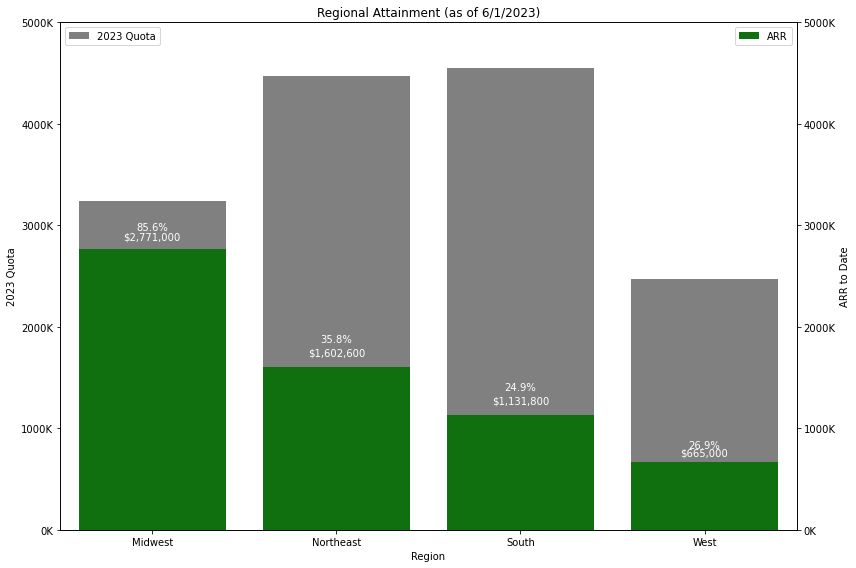

In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the first subplot for the 2023 Quota
ax1 = plt.subplot(1, 1, 1)
sns.barplot(x='Region', y='2023 Quota', data=performance_by_region_df, color='grey', label='2023 Quota')
ax1.set_ylabel('2023 Quota')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax1.set_ylim(0, 5000000)  # Set the limit up to 5000K

# Create the second subplot for the ARR
ax2 = ax1.twinx()
sns.barplot(x='Region', y='ARR', data=performance_by_region_df, color='green', label='ARR', ax=ax2)
ax2.set_ylabel('ARR to Date')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax2.set_ylim(0, 5000000)  # Set the limit up to 5000K

# Adding labels and title
plt.xlabel('Region')
plt.title('Regional Attainment (as of 6/1/2023)')

# Adjust the x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)

# Adding a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add data labels for performance percentage and total ARR
for index, row in performance_by_region_df.iterrows():
    # Adjust the label positions as needed
    performance_label_position = row['ARR'] + 0.05 * row['2023 Quota']
    arr_label_position = row['ARR'] + 0.02 * row['2023 Quota']

    # Ensure labels do not overlap
    if performance_label_position - arr_label_position < 0.03 * row['2023 Quota']:
        arr_label_position -= 0.03 * row['2023 Quota']

    # Add performance percentage label
    ax2.text(index, performance_label_position, f"{row['Performance']:.1%}", color='white', ha="center", va='bottom')

    # Add ARR label
    ax2.text(index, arr_label_position, f"${row['ARR']:,.0f}", color='white', ha="center", va='bottom')

# Show the plot
plt.tight_layout()
plt.show()



### Sales Lead Performance Against Quota

#### Count of Deals Won by Sales Lead
- **Sales Lead D:** Highest number of deals won (47), indicating high activity and effectiveness.
- **Sales Lead H:** Strong performance with 25 deals won.
- **Sales Leads E, F, G:** Lowest deal counts (10 each), suggesting fewer closed deals or smaller territories/industries.

#### Performance Against Quota
- **Sales Lead D:** Not only leads in deal count but also has the highest quota performance at ~80%, indicating effective sales strategies or favorable market conditions in the Midwest.
- **Sales Lead H:** Also shows strong performance against quota (~67%).
- **Sales Leads B, C, I:** Despite moderate to high deal counts, they show lower performance ratios (30-35%), possibly due to lower deal values or higher quotas.
- **Sales Lead A:** With 20 deals, performance against quota is ~40%, suggesting the deals might be of lower value.

#### Regional Performance
- **Midwest:** Represented by Sales Leads D and H, showing strong performance in both deal counts and quota achievement.
- **Northeast and South:** Sales Leads in these regions are **underperforming** relative to their quotas. In the Northeast, *Sales Lead A* is the closest to the halfway mark, having achieved just over 40% of their quota. The South region sees a similar trend, with the best performance at about 34% of the quota by *Sales Lead C*.
- **West:** This region is **significantly behind** the quota, with *Sales Lead F* and *G* both achieving less than 30% of their targets.


#### Insights and Strategic Implications
- The disparity in performance, despite high deal counts for some Sales Leads, suggests a need to evaluate deal quality and the quota setting process.
- Success in the Midwest region could provide valuable strategies or practices to be replicated in other regions.
- Training and support might benefit Sales Leads with lower performance ratios.
- A mid-year review could be crucial to adjust strategies, reassess quotas, and provide targeted support.

This data indicates the need for a nuanced approach to sales strategy and performance management, with clear strengths and areas for improvement.


In [39]:
# Filter df1 for 'Deal Won' stage
won_deals = df1[df1['Stage'] == 'Deal Won']

# Step 1: Aggregate ARR by Sales Leader without including Region
total_ARR_by_leader = won_deals.groupby('Opportunity Owner')['ARR'].sum().reset_index()

# Step 2: Merge with Quota Data
performance_df = pd.merge(total_ARR_by_leader, df2, left_on='Opportunity Owner', right_on='Individual', how='left')

# Additional Step: Add Region information
# Create a mapping from Opportunity Owner to Region
region_mapping = df1.drop_duplicates('Opportunity Owner').set_index('Opportunity Owner')['Region']
# Apply this mapping to the performance_df
performance_df['Region'] = performance_df['Opportunity Owner'].map(region_mapping)

# Step 3: Calculate Performance Metrics
performance_df['Performance'] = performance_df['ARR'] / performance_df['2023 Quota']

# Step 4: Analyze the Data
# Display the DataFrame for analysis
performance_df[['Opportunity Owner', 'ARR', '2023 Quota', 'Performance', 'Region']]



,Opportunity Owner,ARR,2023 Quota,Performance,Region
0,Sales Lead A,806500,2001000.0,0.403048,Northeast
1,Sales Lead B,691800,2274000.0,0.304222,South
2,Sales Lead C,782000,2276000.0,0.343585,South
3,Sales Lead D,1595000,2001000.0,0.797101,Midwest
4,Sales Lead E,368700,1236500.0,0.298180,Northeast
5,Sales Lead F,314000,1236500.0,0.253943,West
6,Sales Lead G,351000,1236500.0,0.283866,West
7,Sales Lead H,834000,1236500.0,0.674484,Midwest
8,Sales Lead I,427400,1236500.0,0.345653,Northeast


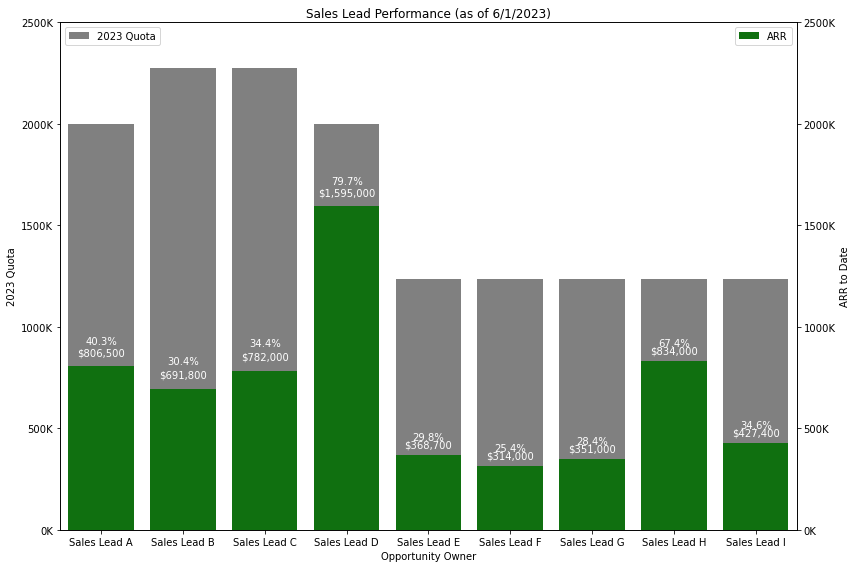

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the first subplot for the 2023 Quota
ax1 = plt.subplot(1, 1, 1)
sns.barplot(x='Opportunity Owner', y='2023 Quota', data=performance_df, color='grey', label='2023 Quota')
ax1.set_ylabel('2023 Quota')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax1.set_ylim(0, 2500000)  # Set the limit up to 2500K

# Create the second subplot for the ARR
ax2 = ax1.twinx()
sns.barplot(x='Opportunity Owner', y='ARR', data=performance_df, color='green', label='ARR', ax=ax2)
ax2.set_ylabel('ARR to Date')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
ax2.set_ylim(0, 2500000)  # Set the limit up to 2500K

# Adding labels and title
plt.xlabel('Sales Lead')
plt.title('Sales Lead Performance (as of 6/1/2023)')

# Adjust the x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)

# Adding a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add data labels for performance percentage and total ARR
for index, row in performance_df.iterrows():
    # Adjust the label positions as needed
    performance_label_position = row['ARR'] + 0.05 * row['2023 Quota']
    arr_label_position = row['ARR'] + 0.02 * row['2023 Quota']

    # Ensure labels do not overlap
    if performance_label_position - arr_label_position < 0.03 * row['2023 Quota']:
        arr_label_position -= 0.03 * row['2023 Quota']

    # Add performance percentage label
    ax2.text(index, performance_label_position, f"{row['Performance']:.1%}", color='white', ha="center", va='bottom')

    # Add ARR label
    ax2.text(index, arr_label_position, f"${row['ARR']:,.0f}", color='white', ha="center", va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [41]:
# Filter the DataFrame for Priority Accounts and 'Deal Won' stage
priority_deals_won_df = df1[(df1['Priority Account'] == 'Yes') & (df1['Stage'] == 'Deal Won')]

# Group by 'Industry' and 'Opportunity Owner', then calculate mean, median, and count for 'ARR'
industry_owner_stats_priority = priority_deals_won_df.groupby(['Industry', 'Opportunity Owner'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by industry for Priority Accounts
industry_subtotals_priority = priority_deals_won_df.groupby('Industry')['ARR'].count().rename('Total Count by Industry for Priority Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Industry and Opportunity Owner for Deals Won Priority Accounts:")
print(industry_owner_stats_priority)
print("\nSubtotals of Count by Industry for Deals Won Priority Accounts:")
print(industry_subtotals_priority)


Mean, Median, and Count of ARR by Industry and Opportunity Owner for Deals Won Priority Accounts:
                                      mean   median  count
Industry   Opportunity Owner                              
Education  Sales Lead A       36933.333333  38000.0      3
           Sales Lead B       48000.000000  51000.0      3
           Sales Lead C       27000.000000  27000.0      1
           Sales Lead D       25941.176471  25000.0     17
           Sales Lead E       32200.000000  32200.0      1
           Sales Lead G       25000.000000  25000.0      2
           Sales Lead H       25000.000000  25000.0      5
           Sales Lead I       32350.000000  31200.0      4
Healthcare Sales Lead A       46666.666667  51000.0      3
           Sales Lead B       52000.000000  52000.0      2
           Sales Lead C       42000.000000  40000.0      9
           Sales Lead D       39564.705882  40000.0     17
           Sales Lead F       40000.000000  40000.0      2
           Sales 

In [42]:
# Filter the DataFrame for 'Deal Won' stage
all_deals_won_df = df1[df1['Stage'] == 'Deal Won']

# Group by 'Opportunity Owner' (Sales Lead) and 'Industry', then calculate mean, median, and count for 'ARR'
sales_lead_industry_stats_all = all_deals_won_df.groupby(['Opportunity Owner', 'Industry'])['ARR'].agg(['mean', 'median', 'count'])

# Calculate subtotals of the count by Sales Lead for All Accounts
sales_lead_subtotals_all = all_deals_won_df.groupby('Opportunity Owner')['ARR'].count().rename('Total Count by Sales Lead for All Accounts')

# Display the results
print("Mean, Median, and Count of ARR by Sales Lead and Industry for Deals Won All Accounts:")
print(sales_lead_industry_stats_all)
print("\nSubtotals of Count by Sales Lead for Deals Won All Accounts:")
print(sales_lead_subtotals_all)



Mean, Median, and Count of ARR by Sales Lead and Industry for Deals Won All Accounts:
                                                mean   median  count
Opportunity Owner Industry                                          
Sales Lead A      Education             33466.666667  35400.0      6
                  Healthcare            41200.000000  39000.0     10
                  Small Office          38900.000000  32200.0      3
                  Travel/Leisure        77000.000000  77000.0      1
Sales Lead B      Education             49250.000000  52000.0      4
                  Healthcare            46000.000000  45500.0      4
                  Small Office          58200.000000  58200.0      4
                  Travel/Leisure        39000.000000  39000.0      2
Sales Lead C      Education             40000.000000  40000.0      2
                  Healthcare            41600.000000  40000.0     10
                  Office                27000.000000  27000.0      1
                 

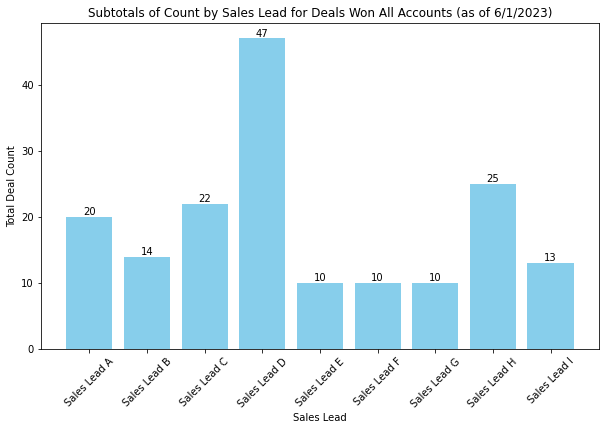

In [43]:
import matplotlib.pyplot as plt

# Data for charting
sales_lead_counts = {
    "Sales Lead A": 20,
    "Sales Lead B": 14,
    "Sales Lead C": 22,
    "Sales Lead D": 47,
    "Sales Lead E": 10,
    "Sales Lead F": 10,
    "Sales Lead G": 10,
    "Sales Lead H": 25,
    "Sales Lead I": 13
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_lead_counts.keys(), sales_lead_counts.values(), color='skyblue')

# Adding labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Sales Lead')
plt.ylabel('Total Deal Count')
plt.title('Subtotals of Count by Sales Lead for Deals Won All Accounts (as of 6/1/2023)')
plt.xticks(rotation=45)
plt.show()


In [44]:
df1.head()

,Opportunity_ID,Opportunity Owner,Industry,Market,Region,Created Date,Close Date,ARR,Stage,Priority Account
0,Education_1,Sales Lead A,Education,DC / Baltimore,Northeast,2021-02-02,2023-10-23,38000,Pipeline,No
1,Education_2,Sales Lead A,Education,Philadelphia,Northeast,2021-09-16,2023-06-12,53000,Pipeline,Yes
2,Education_3,Sales Lead G,Education,Los Angeles,West,2021-12-17,2023-12-27,51000,Discovery,No
3,Education_4,Sales Lead G,Education,Los Angeles,West,2021-12-17,2023-08-21,51000,Discovery,No
4,Healthcare_1,Sales Lead A,Healthcare,DC / Baltimore,Northeast,2022-01-05,2023-09-08,38000,Pipeline,No


# Assessing Pipeline

1. Distribution of Opportunities Across Stages:
Count and Percentage: Calculate the number and percentage of opportunities in each stage (Discovery, Pipeline, Deal Won). This will give an overview of how opportunities are progressing through the sales funnel.


In [45]:
# Count of opportunities in each stage
stage_counts = df1['Stage'].value_counts()

# Percentage of opportunities in each stage
stage_percentages = df1['Stage'].value_counts(normalize=True) * 100

# Creating a DataFrame to display the results
stage_distribution_df = pd.DataFrame({
    'Stage': stage_counts.index,
    'Count': stage_counts.values,
    'Percentage': stage_percentages.values
})

# Display the DataFrame
print(stage_distribution_df)


       Stage  Count  Percentage
0  Discovery    334   53.870968
1   Deal Won    171   27.580645
2   Pipeline    115   18.548387


In [46]:
# Sum of ARR for each stage
arr_by_stage = df1.groupby('Stage')['ARR'].sum().reset_index()

# Renaming columns for clarity
arr_by_stage.columns = ['Stage', 'Total ARR']

# Display the DataFrame
print(arr_by_stage)


       Stage  Total ARR
0   Deal Won    6170400
1  Discovery   10766600
2   Pipeline    4285400


### Data Insight: Successful deals often have a faster progression through the sales stages.

Assumption: I am seeing a large discrepancy between the Sales Cycle Length by Stages. Half of the Deals Won closed within 50 days, where the expected close dates for the Discovery and Pipeline stages are 203 days and 267 days respectively. 

Normally, I would want to confirm with the Sales Team that opportunities are logged in a timely manner, and not when Deals are expected to close, but for the purposes of this analysis, I am assuming that all data is logged in a reasonable amount of time. 

Note - Median as a Better Central Tendency Measure: In a right-skewed distribution, the median is often a better measure of central tendency than the mean. This is because the median is less affected by extreme values. The median represents the middle value in your data set, where half the sales cycles are shorter and half are longer.

- Median Discovery Stage Length (202.50 days): Half of the opportunities spend 202.5 days or less in the Discovery stage. The median being lower than the mean suggests that while most opportunities move through this stage more quickly, there are some that take much longer, thus increasing the average.

- Median Pipeline Stage Length (267.00 days): Half of the opportunities spend 267 days or less in the Pipeline stage. Similar to the Discovery stage, the median is lower than the mean, indicating that a few lengthy deals are pushing up the average duration.

- Median Deal Won Sales Cycle Length (50.00 days): Half of the won deals have a sales cycle of 50 days or less. This further supports the idea that successful deals often have a faster progression through the sales stages.

- Most deals most successful deals ('Deal Won') typically close within around 50 days, opportunities that exceed this duration, especially those significantly beyond the median in the 'Discovery' and 'Pipeline' stages, could indeed be at a higher risk of not closing successfully.

#### Conclusion:
While a longer-than-average sales cycle doesn't automatically doom an opportunity, it does flag it for closer attention. The Sales teams should regularly review such opportunities to determine if they are still viable and to strategize on how to effectively move them forward or reallocate resources as needed. This approach helps in maintaining a healthy and efficient sales pipeline.


In [47]:
# Add a column for Sales Cycle Length if not already present
df1['Sales Cycle Length'] = (df1['Close Date'] - df1['Created Date']).dt.days

# Calculate the mean and median sales cycle length for won deals
mean_sales_cycle_length = df1.loc[df1['Stage'] == 'Deal Won', 'Sales Cycle Length'].mean()
median_sales_cycle_length = df1.loc[df1['Stage'] == 'Deal Won', 'Sales Cycle Length'].median()

# Calculate mean and median for Discovery Stage (assuming direct transition to Deal Won)
mean_discovery = df1.loc[df1['Stage'] == 'Discovery', 'Sales Cycle Length'].mean()
median_discovery = df1.loc[df1['Stage'] == 'Discovery', 'Sales Cycle Length'].median()

# Calculate mean and median for Pipeline Stage
mean_pipeline = df1.loc[df1['Stage'] == 'Pipeline', 'Sales Cycle Length'].mean()
median_pipeline = df1.loc[df1['Stage'] == 'Pipeline', 'Sales Cycle Length'].median()

# Display the results
print(f"Mean Discovery Stage Length: {mean_discovery:.2f} days")
print(f"Median Discovery Stage Length: {median_discovery:.2f} days")
print(f"Mean Pipeline Stage Length: {mean_pipeline:.2f} days")
print(f"Median Pipeline Stage Length: {median_pipeline:.2f} days")
print(f"Mean Deal Won Sales Cycle Length: {mean_sales_cycle_length:.2f} days")
print(f"Median Deal Won Sales Cycle Length: {median_sales_cycle_length:.2f} days")

Mean Discovery Stage Length: 213.96 days
Median Discovery Stage Length: 202.50 days
Mean Pipeline Stage Length: 300.85 days
Median Pipeline Stage Length: 267.00 days
Mean Deal Won Sales Cycle Length: 64.68 days
Median Deal Won Sales Cycle Length: 50.00 days


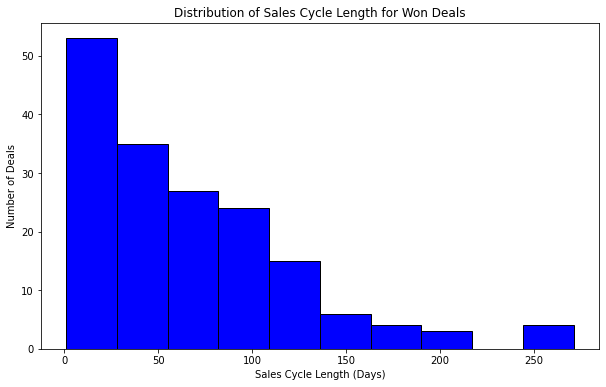

In [48]:
import matplotlib.pyplot as plt

# Filter the DataFrame for won deals
won_deals = df1[df1['Stage'] == 'Deal Won']

# Extract the 'Sales Cycle Length' column
sales_cycle_lengths = won_deals['Sales Cycle Length']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sales_cycle_lengths, bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sales Cycle Length (Days)')
plt.ylabel('Number of Deals')
plt.title('Distribution of Sales Cycle Length for Won Deals')

# Show the plot
plt.show()


In [49]:
sales_cycle_stats_by_stage = df1.groupby('Stage')['Sales Cycle Length'].describe()
sales_cycle_stats_by_stage

,count,mean,std,min,25%,50%,75%,max
Stage,,,,,,,,
Deal Won,171.0,64.678363,55.436944,1.0,21.0,50.0,88.0,271.0
Discovery,334.0,213.955090,112.907764,28.0,133.0,202.5,261.0,740.0
Pipeline,115.0,300.852174,159.533654,76.0,190.0,267.0,384.0,993.0


In [50]:
# Filter for opportunities with cycle length under 25 days
opportunities_under_25_days = df1[df1['Sales Cycle Length'] >50]

# Counting the filtered opportunities by stage
opportunities_count_by_stage = opportunities_under_25_days['Stage'].value_counts()
opportunities_count_by_stage

Discovery    329
Pipeline     115
Deal Won      85
Name: Stage, dtype: int64

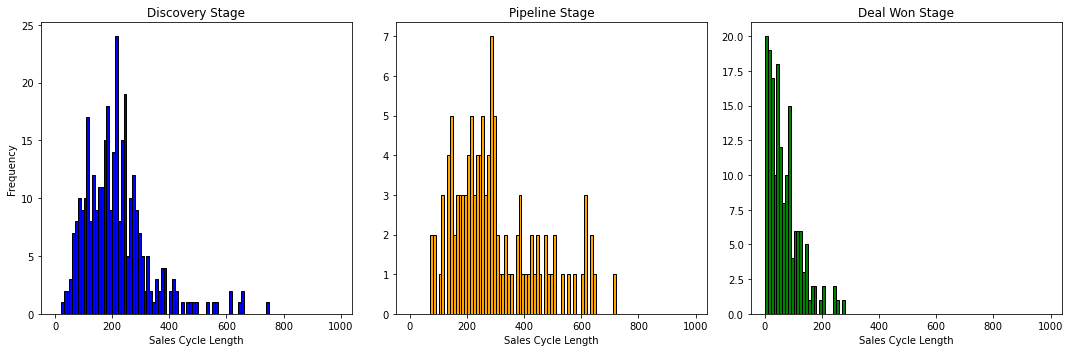

In [51]:
# Filtering the DataFrame by each stage
discovery_stage = df1[df1['Stage'] == 'Discovery']
pipeline_stage = df1[df1['Stage'] == 'Pipeline']
deal_won_stage = df1[df1['Stage'] == 'Deal Won']

# Determine the common bin range for all histograms
max_cycle_length = df1['Sales Cycle Length'].max()
bins = range(0, max_cycle_length + 1, 10)  # Adjust the step as necessary

# Creating histograms for each stage with the same x-axis bins
plt.figure(figsize=(15, 5))

# Histogram for Discovery Stage
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.hist(discovery_stage['Sales Cycle Length'], bins=bins, color='blue', edgecolor='black')
plt.title('Discovery Stage')
plt.xlabel('Sales Cycle Length')
plt.ylabel('Frequency')

# Histogram for Pipeline Stage
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.hist(pipeline_stage['Sales Cycle Length'], bins=bins, color='orange', edgecolor='black')
plt.title('Pipeline Stage')
plt.xlabel('Sales Cycle Length')

# Histogram for Deal Won Stage
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.hist(deal_won_stage['Sales Cycle Length'], bins=bins, color='green', edgecolor='black')
plt.title('Deal Won Stage')
plt.xlabel('Sales Cycle Length')

plt.tight_layout()  # Adjust layout
plt.show()



In [52]:
# Total number of opportunities in each stage
total_opportunities_by_stage = df1['Stage'].value_counts()

# Number of opportunities over 50 days in each stage
over_50_opportunities_by_stage = df1[df1['Sales Cycle Length'] >= 50]['Stage'].value_counts()

# Calculating the percentage of opportunities over 50 days in each stage
percentage_over_50_by_stage = (over_50_opportunities_by_stage / total_opportunities_by_stage) * 100

# Combine the data into a single DataFrame for easier interpretation
opportunities_summary = pd.DataFrame({
    'Total Opportunities': total_opportunities_by_stage,
    'Opportunities Over 50 Days': over_50_opportunities_by_stage,
    'Percentage Over 50 Days': percentage_over_50_by_stage
})

# Display the summary
print(opportunities_summary)


           Total Opportunities  Opportunities Over 50 Days  \
Deal Won                   171                          87   
Discovery                  334                         329   
Pipeline                   115                         115   

           Percentage Over 50 Days  
Deal Won                 50.877193  
Discovery                98.502994  
Pipeline                100.000000  


In [53]:
# Counting the number of opportunities per stage that are 50 days or less
opportunities_50_days_or_less = df1[df1['Sales Cycle Length'] <= 50].groupby('Stage').size()

# Calculating the total number of opportunities in each stage
total_opportunities_by_stage = df1.groupby('Stage').size()

# Calculating the percentage of opportunities per stage that are 50 days or less
percentage_50_days_or_less_by_stage = (opportunities_50_days_or_less / total_opportunities_by_stage) * 100

# Combine the counts and percentages into a single DataFrame
summary_df = pd.DataFrame({
    'Opportunities <= 50 Days': opportunities_50_days_or_less,
    'Percentage <= 50 Days': percentage_50_days_or_less_by_stage
})

# Display the summary DataFrame
print(summary_df)



           Opportunities <= 50 Days  Percentage <= 50 Days
Stage                                                     
Deal Won                       86.0              50.292398
Discovery                       5.0               1.497006
Pipeline                        NaN                    NaN


In [54]:
# Counting the number of opportunities per stage that are over 51 days
opportunities_over_50_days = df1[df1['Sales Cycle Length'] > 50].groupby('Stage').size()

# Calculating the total number of opportunities in each stage
total_opportunities_by_stage = df1.groupby('Stage').size()

# Calculating the percentage of opportunities per stage that are over 51 days
percentage_over_50_days_by_stage = (opportunities_over_50_days / total_opportunities_by_stage) * 100

# Combine the counts and percentages into a single DataFrame
summary_over_50_days_df = pd.DataFrame({
    'Opportunities > 50 Days': opportunities_over_50_days,
    'Percentage > 50 Days': percentage_over_50_days_by_stage
})

# Display the summary DataFrame
print(summary_over_50_days_df)

           Opportunities > 50 Days  Percentage > 50 Days
Stage                                                   
Deal Won                        85             49.707602
Discovery                      329             98.502994
Pipeline                       115            100.000000


<Figure size 864x432 with 0 Axes>

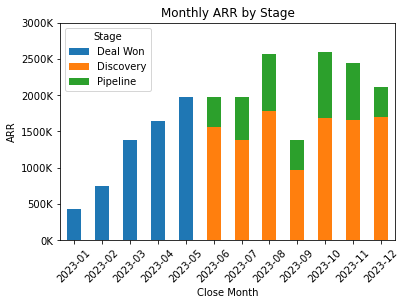

In [55]:
# Extracting the month from the 'Close Date'
df1['Close Month'] = df1['Close Date'].dt.to_period('M')

# Grouping data by 'Close Month' and 'Stage', then summing the ARR
grouped_data = df1.groupby(['Close Month', 'Stage'])['ARR'].sum().unstack()

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)

# Setting the title and labels
plt.title('Monthly ARR by Stage')
plt.xlabel('Close Month')
plt.ylabel('ARR')

# Adjusting the y-axis to have bins of 500K up to 3000K and labeling them as 500K increments
y_labels = [f"{int(i/1000)}K" for i in range(0, 3000000 + 1, 500000)]
plt.yticks(range(0, 3000000 + 1, 500000), labels=y_labels)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()